In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
file_path = "../output/CostOfLivingAPI.csv"
cost_of_living_df = pd.read_csv(file_path)

In [46]:
cost_of_living_df["total_costs"] = (
    cost_of_living_df["apt1_city_centre"] +
    cost_of_living_df["ticket_monthly"] +
    cost_of_living_df["utilities"] +
    cost_of_living_df["internet"]
)

In [48]:
cost_of_living_df["score_allgemein"] = cost_of_living_df["net_salary"] / cost_of_living_df["total_costs"]

In [60]:
cost_of_living_df = cost_of_living_df[cost_of_living_df["country"] != "switzerland"]

In [62]:
avg_netto_scraped = cost_of_living_df[["city", "country", "net_salary"]].copy()

In [64]:
merged_df = pd.merge(cost_of_living_df, avg_netto_scraped, how="inner", on=["city", "country"], suffixes=("", "_merged"))

In [66]:
merged_df = merged_df.sort_values(by="total_costs", ascending=False)

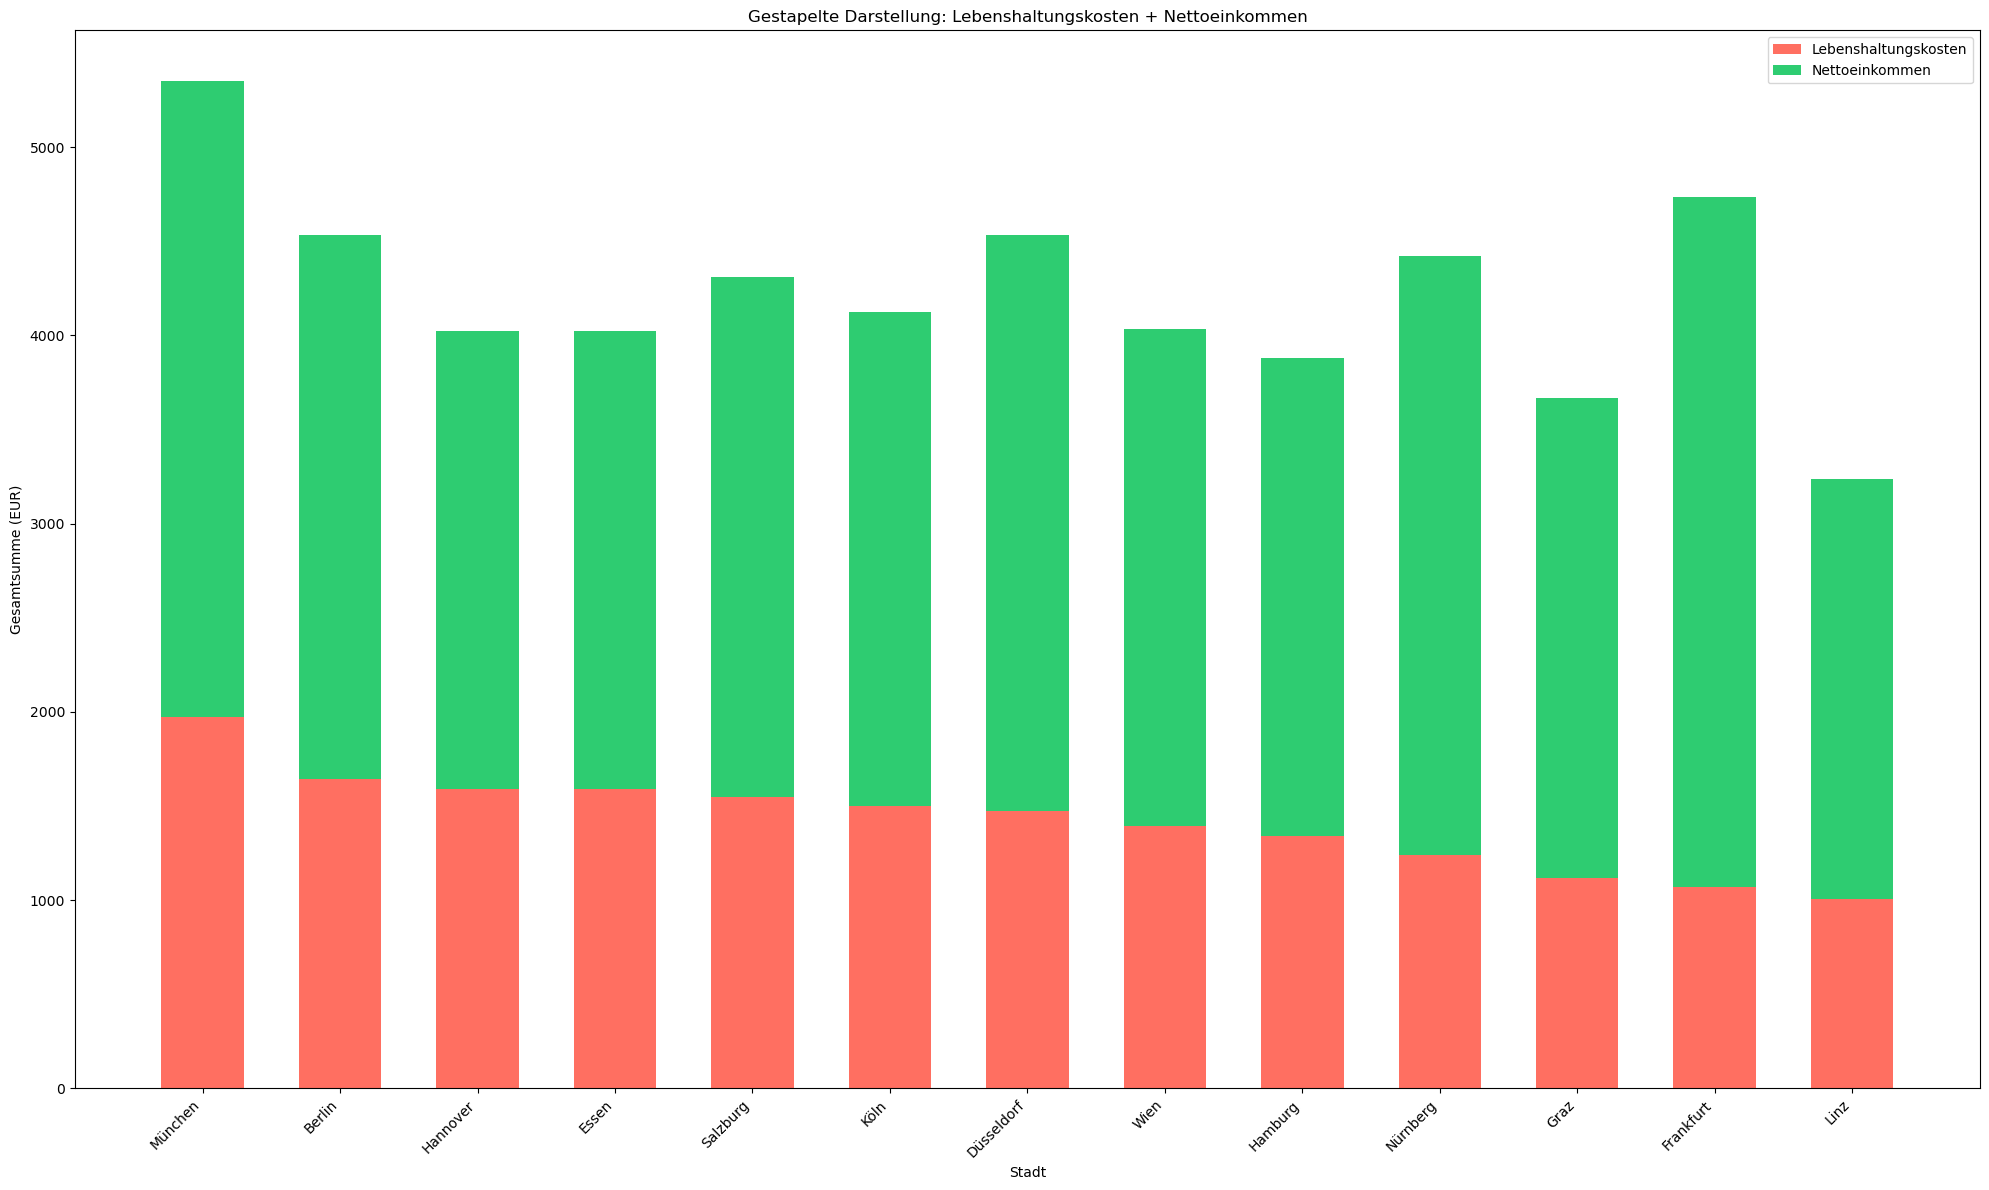

In [13]:
cities = merged_df["city"]
x = range(len(cities))
bar_width = 0.6

plt.figure(figsize=(20, 12))

# Erst Lebenshaltungskosten (unten)
plt.bar(x, merged_df["total_costs"], label="Lebenshaltungskosten", color="#FF6F61", width=bar_width)

# Dann Nettoeinkommen (oben drauf)
plt.bar(x, merged_df["net_salary"], bottom=merged_df["total_costs"], label="Nettoeinkommen", color="#2ECC71", width=bar_width)

plt.xlabel("Stadt")
plt.ylabel("Gesamtsumme (EUR)")
plt.title("Gestapelte Darstellung: Lebenshaltungskosten + Nettoeinkommen")
plt.xticks(x, cities, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()